In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [53]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
submit_df = pd.read_csv('./data/sample_submission.csv')

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [56]:
train_df_obj = train_df.select_dtypes(include='object')
train_df_obj.describe()

,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간
count,10000,10000,10000,10000,10000
unique,10000,4,11,14,2
top,TRAIN_09983,월세,10년 이상,부채 통합,단기 상환
freq,1,4050,3828,7294,6975


In [57]:
train_df = pd.get_dummies(train_df, columns=['주거 형태'])
test_df = pd.get_dummies(test_df, columns=['주거 형태'])

In [58]:
ordinal_mapping = {
    '1년 미만': 0,
    '1년': 1,
    '2년': 2,
    '3년': 3,
    '4년': 4,
    '5년': 5,
    '6년': 6,
    '7년': 7,
    '8년': 8,
    '9년': 9,
    '10년 이상': 10
}
train_df['현재 직장 근속 연수'] = train_df['현재 직장 근속 연수'].map(ordinal_mapping)
test_df['현재 직장 근속 연수'] = test_df['현재 직장 근속 연수'].map(ordinal_mapping)

In [ ]:
train_df = pd.get_dummies(train_df, columns=['대출 목적'])
test_df = pd.get_dummies(test_df, columns=['대출 목적'])

In [60]:
train_df['대출 상환 기간'] = train_df['대출 상환 기간'].apply(lambda x: 0 if x == '단기 상환' else 1)
test_df['대출 상환 기간'] = test_df['대출 상환 기간'].apply(lambda x: 0 if x == '단기 상환' else 1)

<Axes: >

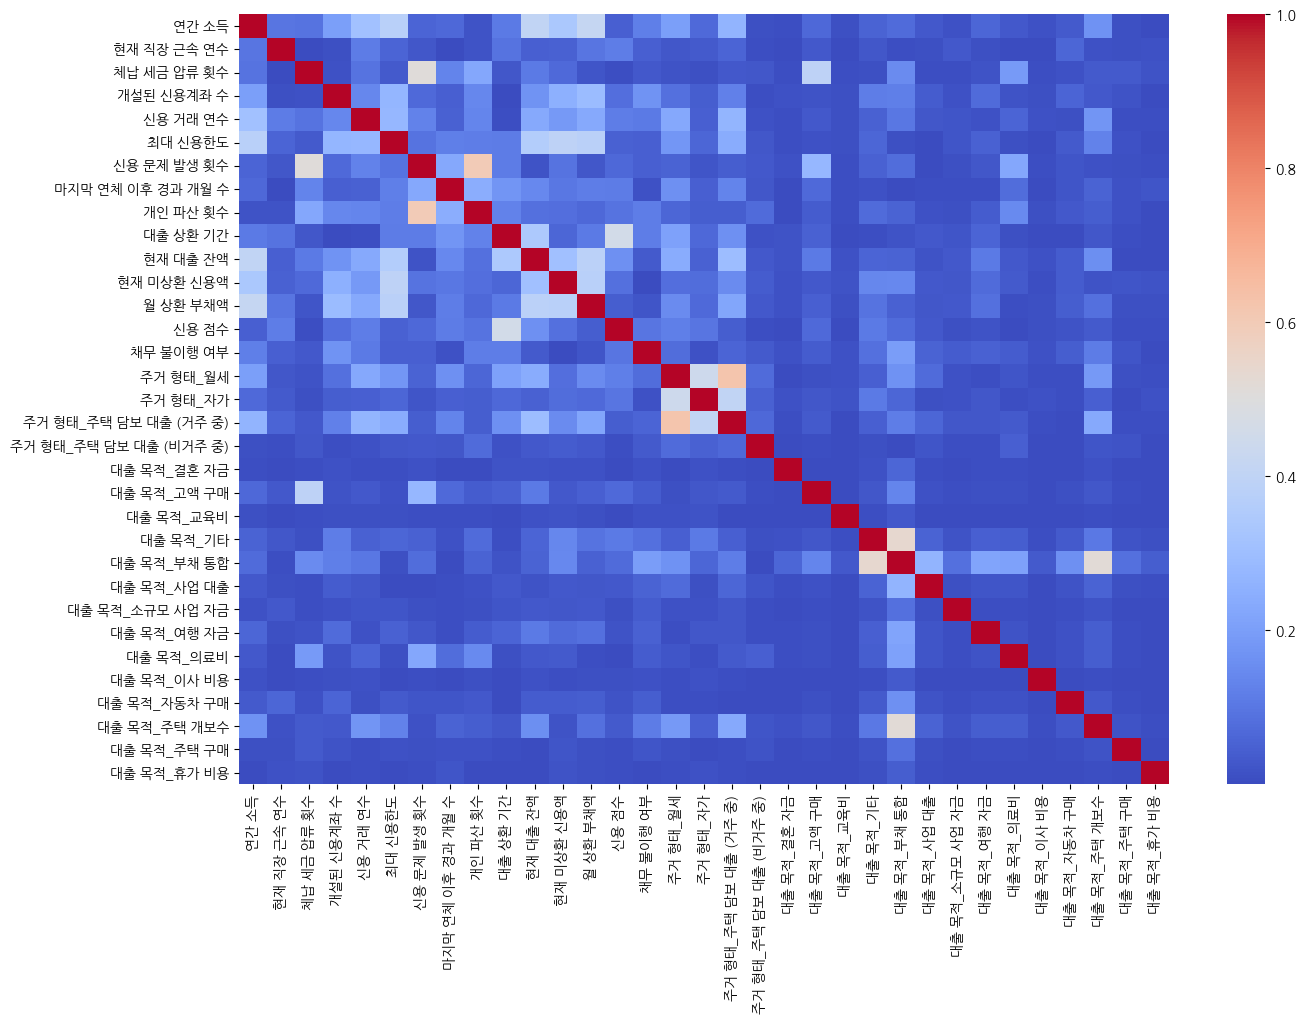

In [61]:
train_df_corr = abs(train_df.select_dtypes(include=[np.number, bool]).corr())
plt.figure(figsize=(15,10))
sns.heatmap(train_df_corr, cmap='coolwarm')

In [62]:
train_df.columns

Index(['UID', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수',
       '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '주거 형태_월세',
       '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
       '대출 목적_결혼 자금', '대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_기타', '대출 목적_부채 통합',
       '대출 목적_사업 대출', '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_의료비',
       '대출 목적_이사 비용', '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매',
       '대출 목적_휴가 비용'],
      dtype='object')

In [ ]:
features = ['연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수',
    '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 상환 기간',
    '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '주거 형태_월세',
    '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)',
    '대출 목적_결혼 자금', '대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_기타', '대출 목적_부채 통합',
    '대출 목적_사업 대출', '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_의료비',
    '대출 목적_이사 비용', '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매',
    '대출 목적_휴가 비용'
]

In [64]:
target = '채무 불이행 여부'

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = train_df[features]
y = train_df[target]

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1270
           1       0.68      0.35      0.46       730

    accuracy                           0.70      2000
   macro avg       0.69      0.63      0.63      2000
weighted avg       0.70      0.70      0.67      2000



In [67]:
import datetime
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2025-02-20'

In [68]:
submit_df['채무 불이행 확률'] = model.predict(test_df[features])
submit_df.to_csv(f'./data/submission_{today}.csv', index=False)